# Project-Melbourne_House Prediction

# Feature Engineering

In [1]:
import pandas as pd
import numpy as np   ## For mathematical calculations
import seaborn as sns   # For data visualization 
import matplotlib.pyplot as plt  # For plotting graphs 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading dataset
df=pd.read_csv('Melbourne_housing_FULL.csv')
#check the columns dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [3]:
#Let’s make a copy of data so that even if we have to make any changes in these datasets we would not lose the original datasets.
data=df.copy()

There is something wrong with data types. Let's change that. For example, there is no reason why postcode is considered as a float while it's clearly a category. I'll take the time to change all the problematic types, one by one

- change Bathroom and Car to integer Series
- Postcode is a categorical variable, not a numeric one
- Yearbuilt should be an integer

In [4]:
#lets change the postcode numerical to categorical
df['Postcode']=df['Postcode'].astype('object')

In [5]:
# The above data we can notice that "Date" is also converted to category. 
# In this step we will cast date to datetime
from datetime import datetime
df['Date']=pd.to_datetime(df['Date'])
df['Date'].unique()

array(['2016-03-09T00:00:00.000000000', '2016-03-12T00:00:00.000000000',
       '2016-04-02T00:00:00.000000000', '2017-04-03T00:00:00.000000000',
       '2016-04-06T00:00:00.000000000', '2016-06-08T00:00:00.000000000',
       '2016-07-05T00:00:00.000000000', '2016-07-11T00:00:00.000000000',
       '2016-08-10T00:00:00.000000000', '2016-10-12T00:00:00.000000000',
       '2016-12-11T00:00:00.000000000', '2016-08-13T00:00:00.000000000',
       '2016-05-14T00:00:00.000000000', '2016-10-15T00:00:00.000000000',
       '2016-04-16T00:00:00.000000000', '2016-07-16T00:00:00.000000000',
       '2016-09-17T00:00:00.000000000', '2017-03-18T00:00:00.000000000',
       '2016-06-18T00:00:00.000000000', '2016-11-19T00:00:00.000000000',
       '2016-05-22T00:00:00.000000000', '2016-08-22T00:00:00.000000000',
       '2016-04-23T00:00:00.000000000', '2016-09-24T00:00:00.000000000',
       '2017-02-25T00:00:00.000000000', '2016-07-26T00:00:00.000000000',
       '2016-11-27T00:00:00.000000000', '2016-05-28

In [6]:
#extract year from date
df['Year']=df['Date'].apply(lambda x:x.year)
df['Year']

0        2016
1        2016
2        2016
3        2016
4        2017
         ... 
34852    2018
34853    2018
34854    2018
34855    2018
34856    2018
Name: Year, Length: 34857, dtype: int64

In [7]:
#extract month from date
df['Month']=df['Date'].apply(lambda x:x.month)
df['Month']

0        3
1        3
2        4
3        4
4        4
        ..
34852    2
34853    2
34854    2
34855    2
34856    2
Name: Month, Length: 34857, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  object        
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  object        
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  object        
 6   SellerG        34857 non-null  object        
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  object        
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

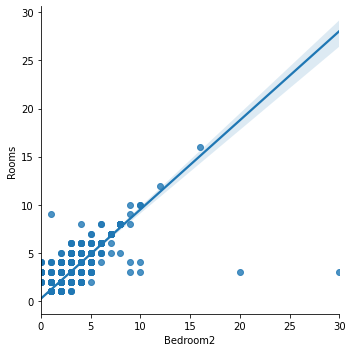

In [9]:
#lets check scatterplot Bedroom2 vs Price
sns.lmplot(x='Bedroom2',y='Rooms',data=df)

Here Bedroom2 is very similar to Rooms we can see that above the relationship is almost Perfectly linear and they 2 columns are almostly perfect match. so that I'll drop Bedroom2 in next step

In [10]:
#drop the bedroom
df.drop('Bedroom2',axis=1,inplace=True)

In [11]:
#It looks like address is not much impacted on Price column so,we can drop it
#drop address column
df.drop('Address',axis=1,inplace=True)

In [12]:
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Month
0,Abbotsford,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067,1.0,...,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,2016,3
1,Abbotsford,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067,1.0,...,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,2016,3
2,Abbotsford,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067,1.0,...,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,2016,4
3,Abbotsford,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067,2.0,...,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,2016,4
4,Abbotsford,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067,2.0,...,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,2017,4


In [13]:
## Always remember there way always be a chance of data leakage so we need to split the data first and then apply feature
## Engineering
#we are taken test data has Price null values
test_data=df[df['Price'].isnull()]

In [14]:
#Here we taken train data has Price not null values
train_data=df.dropna(subset=['Price'])

In [15]:
#check the shape of train,test data
train_data.shape,test_data.shape

((27247, 21), (7610, 21))

In [16]:
train_data.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Month
1,Abbotsford,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067,1.0,...,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,2016,3
2,Abbotsford,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067,1.0,...,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,2016,4
4,Abbotsford,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067,2.0,...,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,2017,4
5,Abbotsford,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067,2.0,...,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,2017,4
6,Abbotsford,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067,1.0,...,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,2016,4


# Data Cleaning

In [17]:
#check the percentage of missing values
(train_data.isnull().sum()/len(train_data))*100

Suburb            0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.003670
Postcode          0.003670
Bathroom         23.661321
Car              25.044959
Landsize         34.003744
BuildingArea     60.891107
YearBuilt        55.650163
CouncilArea       0.011010
Lattitude        22.952986
Longtitude       22.952986
Regionname        0.011010
Propertycount     0.011010
Year              0.000000
Month             0.000000
dtype: float64

In [18]:
#list of categorical features
categorical_features=[feature for feature in train_data.columns if train_data[feature].dtypes=='O']
categorical_features

['Suburb',
 'Type',
 'Method',
 'SellerG',
 'Postcode',
 'CouncilArea',
 'Regionname']

In [19]:
#checking categorical features of missing values
train_data[categorical_features].isnull().sum()

Suburb         0
Type           0
Method         0
SellerG        0
Postcode       1
CouncilArea    3
Regionname     3
dtype: int64

In [20]:
#missing value imputation
train_data['Postcode'].fillna(train_data['Postcode'].mode()[0],inplace=True)
train_data['CouncilArea'].fillna(train_data['CouncilArea'].mode()[0],inplace=True)
train_data['Regionname'].fillna(train_data['Regionname'].mode()[0],inplace=True)

In [21]:
#list of numerical features
numerical_features=[feature for feature in train_data.columns if train_data[feature].dtypes!='O']
numerical_features

['Rooms',
 'Price',
 'Date',
 'Distance',
 'Postcode',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount',
 'Year',
 'Month']

In [22]:
#checking missing values of numerical_features
train_data[numerical_features].isnull().sum()

Rooms                0
Price                0
Date                 0
Distance             1
Postcode             0
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
Lattitude         6254
Longtitude        6254
Propertycount        3
Year                 0
Month                0
dtype: int64

In [23]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables
##Discrete Variables
discrete_feature=[feature for feature in numerical_features if len(train_data[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature

Discrete Variables Count: 5


['Rooms', 'Bathroom', 'Car', 'Year', 'Month']

In [24]:
#check discrete data missing values
train_data[discrete_feature].isnull().sum()

Rooms          0
Bathroom    6447
Car         6824
Year           0
Month          0
dtype: int64

In [25]:
#print bathroom and Car value_counts
print(train_data['Bathroom'].value_counts())
print(train_data['Car'].value_counts())

1.0    10527
2.0     8464
3.0     1537
4.0      176
5.0       46
0.0       34
6.0       10
8.0        3
7.0        2
9.0        1
Name: Bathroom, dtype: int64
2.0     9367
1.0     7400
0.0     1251
3.0     1234
4.0      907
5.0      113
6.0      105
7.0       19
8.0       18
10.0       5
9.0        2
11.0       1
18.0       1
Name: Car, dtype: int64


In [26]:
#fill the missing values with mode
train_data['Bathroom'].fillna(train_data['Bathroom'].mode()[0],inplace=True)
train_data['Car'].fillna(train_data['Car'].mode()[0],inplace=True)

In [27]:
###continuous feature
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))
continuous_feature

Continuous feature Count 10


['Price',
 'Date',
 'Distance',
 'Postcode',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [28]:
#check the missing values
train_data[continuous_feature].isnull().sum()

Price                0
Date                 0
Distance             1
Postcode             0
Landsize          9265
BuildingArea     16591
YearBuilt        15163
Lattitude         6254
Longtitude        6254
Propertycount        3
dtype: int64

In [29]:
#Here Yearbuilt and BuildingArea has 50% values of missing. So we can drop 2 columns and also this 2 columns not much impacted on Price
train_data.drop(['BuildingArea','YearBuilt'],axis=1,inplace=True)

In [30]:
#we can fill the continuous features with median values
train_data['Distance'].fillna(train_data['Distance'].median(),inplace=True)
train_data['Landsize'].fillna(train_data['Landsize'].median(),inplace=True)
train_data['Lattitude'].fillna(train_data['Lattitude'].median(),inplace=True)
train_data['Longtitude'].fillna(train_data['Longtitude'].median(),inplace=True)
train_data['Propertycount'].fillna(train_data['Propertycount'].median(),inplace=True)

In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27247 non-null  object        
 1   Rooms          27247 non-null  int64         
 2   Type           27247 non-null  object        
 3   Price          27247 non-null  float64       
 4   Method         27247 non-null  object        
 5   SellerG        27247 non-null  object        
 6   Date           27247 non-null  datetime64[ns]
 7   Distance       27247 non-null  float64       
 8   Postcode       27247 non-null  float64       
 9   Bathroom       27247 non-null  float64       
 10  Car            27247 non-null  float64       
 11  Landsize       27247 non-null  float64       
 12  CouncilArea    27247 non-null  object        
 13  Lattitude      27247 non-null  float64       
 14  Longtitude     27247 non-null  float64       
 15  Regionname     2724

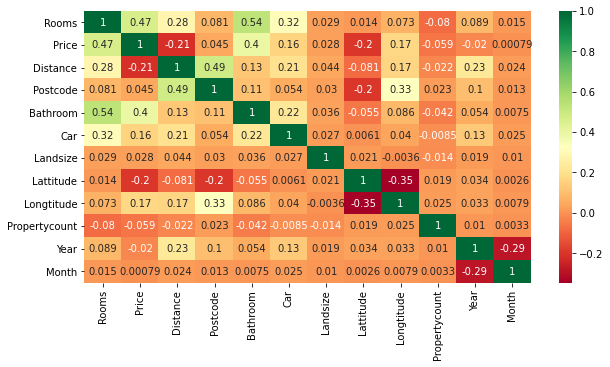

In [32]:
#check correlation among variables
corrmat=train_data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,5))
sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap='RdYlGn')
plt.show()

In [33]:
#check categorical variable of Suburb and SellerG Unique values
print(len(train_data['Suburb'].unique()))
print(len(train_data['SellerG'].unique()))

345
349


Here we can see above Suburb,SellerG have high unique values and it leads to high Cardinality

In [34]:
#Here drop Categorical Columns
train_data.drop(['Suburb','SellerG','CouncilArea','Date','Method'],axis=1,inplace=True)

In [35]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

In [36]:
#Here we convert categorical data into numerical data
train_data=pd.get_dummies(train_data,drop_first=True)

In [37]:
train_data.head()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,...,Month,Type_t,Type_u,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,1480000.0,2.5,3067.0,1.0,1.0,202.0,-37.7996,144.9984,4019.0,...,3,0,0,0,1,0,0,0,0,0
2,2,1035000.0,2.5,3067.0,1.0,0.0,156.0,-37.8079,144.9934,4019.0,...,4,0,0,0,1,0,0,0,0,0
4,3,1465000.0,2.5,3067.0,2.0,0.0,134.0,-37.8093,144.9944,4019.0,...,4,0,0,0,1,0,0,0,0,0
5,3,850000.0,2.5,3067.0,2.0,1.0,94.0,-37.7969,144.9969,4019.0,...,4,0,0,0,1,0,0,0,0,0
6,4,1600000.0,2.5,3067.0,1.0,2.0,120.0,-37.8072,144.9941,4019.0,...,4,0,0,0,1,0,0,0,0,0


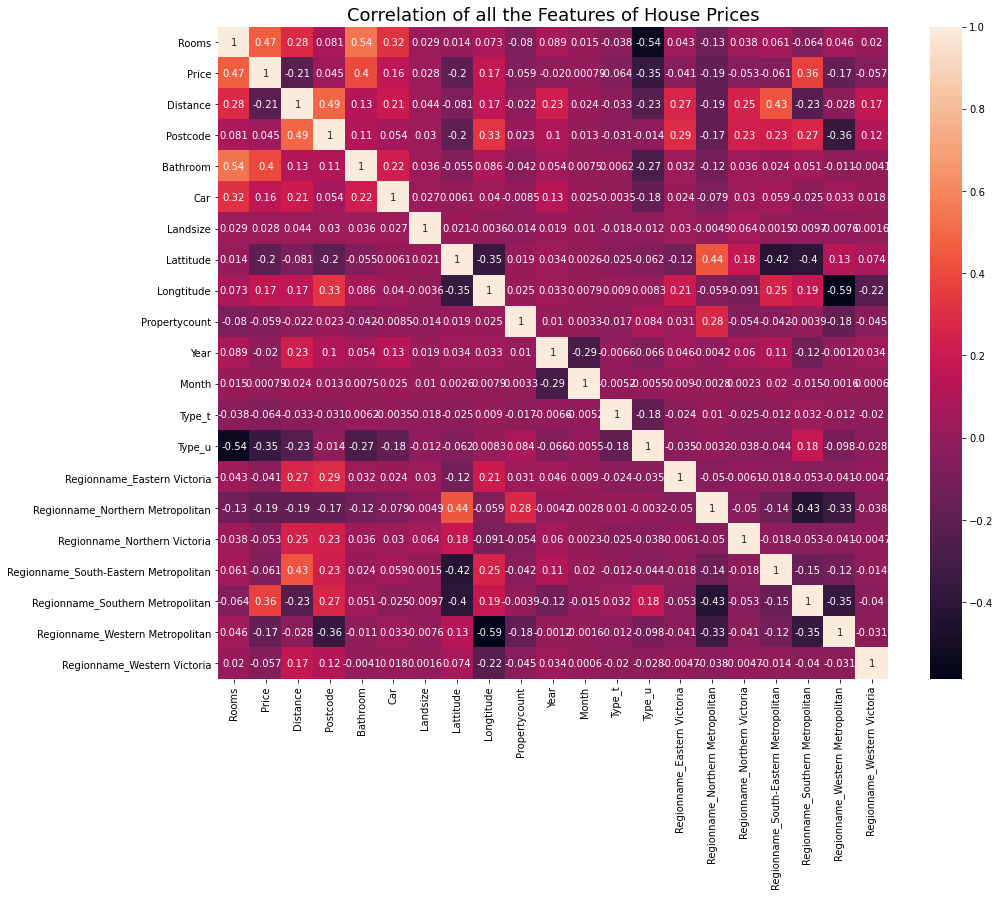

In [38]:
##Checking for feature correlations
corrmat=train_data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(15,12))
plt.title('Correlation of all the Features of House Prices', fontsize=18)
sns.heatmap(train_data[top_corr_features].corr(),annot=True)
plt.show()

In [39]:
#we can assign the train_data into X,y
X=train_data.drop('Price',axis=1)
y=train_data['Price']

In [40]:
X.shape,y.shape

((27247, 20), (27247,))

# Feature Selection

## 1.ExtraTreesRegressor

In [41]:
##feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [42]:
print(model.feature_importances_)

[1.01534251e-01 1.13761090e-01 4.39138016e-02 6.46396166e-02
 2.31354369e-02 6.16245540e-02 4.84889261e-02 5.22075940e-02
 3.41621498e-02 1.77054877e-02 3.35186046e-02 3.58293057e-02
 2.11671128e-01 8.81039717e-05 9.87468191e-03 1.08942963e-04
 1.10445720e-03 1.38490975e-01 7.89045277e-03 2.50440543e-04]


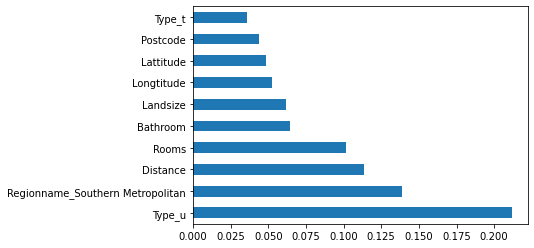

In [43]:
#plot graph feature_imporatances 
feat_imporatances=pd.Series(model.feature_importances_,index=X.columns)
feat_imporatances.nlargest(10).plot(kind='barh')
plt.show()

## 2.Recrusive Feature Elimination

In [44]:
#Reorted which feature were selected by Recrusive Feature Elimination(RFE)
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

In [45]:
rfe=RFE(estimator=DecisionTreeRegressor(),n_features_to_select=5)
rfe.fit(X,y)

RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)

In [46]:
#summarize all features
for i in range(X.shape[1]):
    print('Column: %d,Selected=%s,Rank: %d' %(i,rfe.support_[i],rfe.ranking_[i]) )

Column: 0,Selected=True,Rank: 1
Column: 1,Selected=True,Rank: 1
Column: 2,Selected=False,Rank: 6
Column: 3,Selected=False,Rank: 7
Column: 4,Selected=False,Rank: 9
Column: 5,Selected=True,Rank: 1
Column: 6,Selected=False,Rank: 2
Column: 7,Selected=True,Rank: 1
Column: 8,Selected=False,Rank: 4
Column: 9,Selected=False,Rank: 10
Column: 10,Selected=False,Rank: 5
Column: 11,Selected=False,Rank: 8
Column: 12,Selected=False,Rank: 3
Column: 13,Selected=False,Rank: 15
Column: 14,Selected=False,Rank: 11
Column: 15,Selected=False,Rank: 14
Column: 16,Selected=False,Rank: 13
Column: 17,Selected=True,Rank: 1
Column: 18,Selected=False,Rank: 12
Column: 19,Selected=False,Rank: 16


In [47]:
#the data split into train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [48]:
#Here we apply LinearRegression Algorithm
from sklearn.linear_model import LinearRegression
le=LinearRegression()

In [49]:
#we fit model into data
le.fit(X_train,y_train)

LinearRegression()

In [50]:
pred=le.predict(X_test)
pred

array([ 894776.89284776,  -39234.78299402,  976899.41072682, ...,
       2069386.45136556,  607495.20150164,  767620.86860287])

In [51]:
#we import the metrics in sklearn Library
from sklearn import metrics

In [52]:
#Here check the MSE,MAE,RMSE,R2score
print("Mean Absoluted Error: ",metrics.mean_absolute_error(y_test,pred))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,pred)))
print("r2 score: ",metrics.r2_score(y_test,pred))
print('Mean : ',df['Price'].mean())

Mean Absoluted Error:  281024.2540883827
Mean Squared Error:  194646363221.54904
Root Mean Squared Error:  441187.44680866547
r2 score:  0.5435391909798766
Mean :  1050173.344955408


In [53]:
#In this we perform with test data of Price null values
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7610 entries, 0 to 34850
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         7610 non-null   object        
 1   Rooms          7610 non-null   int64         
 2   Type           7610 non-null   object        
 3   Price          0 non-null      float64       
 4   Method         7610 non-null   object        
 5   SellerG        7610 non-null   object        
 6   Date           7610 non-null   datetime64[ns]
 7   Distance       7610 non-null   float64       
 8   Postcode       7610 non-null   object        
 9   Bathroom       5831 non-null   float64       
 10  Car            5706 non-null   float64       
 11  Landsize       5065 non-null   float64       
 12  BuildingArea   3086 non-null   float64       
 13  YearBuilt      3467 non-null   float64       
 14  CouncilArea    7610 non-null   object        
 15  Lattitude      5888 

In [54]:
#test_data
test_data.isnull().sum()

Suburb              0
Rooms               0
Type                0
Price            7610
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom         1779
Car              1904
Landsize         2545
BuildingArea     4524
YearBuilt        4143
CouncilArea         0
Lattitude        1722
Longtitude       1722
Regionname          0
Propertycount       0
Year                0
Month               0
dtype: int64

In [55]:
test_data.drop(['Price'],axis=1,inplace=True)

In [56]:
#missing value imputation
test_data['Postcode'].fillna(test_data['Postcode'].mode()[0],inplace=True)
test_data['CouncilArea'].fillna(test_data['CouncilArea'].mode()[0],inplace=True)
test_data['Regionname'].fillna(test_data['Regionname'].mode()[0],inplace=True)

In [57]:
#fill the missing values with mode
test_data['Bathroom'].fillna(test_data['Bathroom'].mode()[0],inplace=True)
test_data['Car'].fillna(test_data['Car'].mode()[0],inplace=True)

In [58]:
#we can fill the continuous features with median values
test_data['Distance'].fillna(test_data['Distance'].median(),inplace=True)
test_data['Landsize'].fillna(test_data['Landsize'].median(),inplace=True)
test_data['Lattitude'].fillna(test_data['Lattitude'].median(),inplace=True)
test_data['Longtitude'].fillna(test_data['Longtitude'].median(),inplace=True)
test_data['Propertycount'].fillna(test_data['Propertycount'].median(),inplace=True)

In [59]:
#Here Yearbuilt and BuildingArea has 50% values of missing. So we can drop 2 columns and also this 2 columns not much impacted on Price
test_data.drop(['BuildingArea','YearBuilt'],axis=1,inplace=True)

In [60]:
#we can drop Categorical Variables
test_data.drop(['Suburb','SellerG','CouncilArea','Date','Method'],axis=1,inplace=True)

In [61]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7610 entries, 0 to 34850
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          7610 non-null   int64  
 1   Type           7610 non-null   object 
 2   Distance       7610 non-null   float64
 3   Postcode       7610 non-null   float64
 4   Bathroom       7610 non-null   float64
 5   Car            7610 non-null   float64
 6   Landsize       7610 non-null   float64
 7   Lattitude      7610 non-null   float64
 8   Longtitude     7610 non-null   float64
 9   Regionname     7610 non-null   object 
 10  Propertycount  7610 non-null   float64
 11  Year           7610 non-null   int64  
 12  Month          7610 non-null   int64  
dtypes: float64(8), int64(3), object(2)
memory usage: 832.3+ KB


In [62]:
#we can convert categorical data into numerical data
test_data=pd.get_dummies(test_data,drop_first=True)

In [63]:
test_data.isnull().sum()

Rooms                                    0
Distance                                 0
Postcode                                 0
Bathroom                                 0
Car                                      0
Landsize                                 0
Lattitude                                0
Longtitude                               0
Propertycount                            0
Year                                     0
Month                                    0
Type_t                                   0
Type_u                                   0
Regionname_Eastern Victoria              0
Regionname_Northern Metropolitan         0
Regionname_Northern Victoria             0
Regionname_South-Eastern Metropolitan    0
Regionname_Southern Metropolitan         0
Regionname_Western Metropolitan          0
Regionname_Western Victoria              0
dtype: int64

In [64]:
#X2=test_data##[['Rooms','Distance','Postcode','Bathroom','Car','Landsize','Lattitude','Longtitude','Propertycount','Year','Month',
             # 'Type_t','Type_u','Method_PN','Method_S','Method_SA','Method_SN','Method_SP','Method_SS','Method_VB','Method_W',
              ##'Regionname_Eastern Victoria','Regionname_Northern Metropolitan','Regionname_Northern Victoria','Regionname_South-Eastern Metropolitan',
              #'#Regionname_Southern Metropolitan','Regionname_Western Metropolitan','Regionname_Western Victoria']]

In [65]:
test_data.head()

,Rooms,Distance,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Year,Month,Type_t,Type_u,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,2.5,3067.0,1.0,1.0,126.0,-37.8014,144.9958,4019.0,2016,3,0,0,0,1,0,0,0,0,0
3,3,2.5,3067.0,2.0,1.0,0.0,-37.8114,145.0116,4019.0,2016,4,0,1,0,1,0,0,0,0,0
7,4,2.5,3067.0,2.0,2.0,400.0,-37.7965,144.9965,4019.0,2016,6,0,0,0,1,0,0,0,0,0
8,2,2.5,3067.0,1.0,2.0,201.0,-37.7995,144.9974,4019.0,2016,6,0,0,0,1,0,0,0,0,0
9,2,2.5,3067.0,2.0,1.0,202.0,-37.7996,144.9989,4019.0,2016,6,0,0,0,1,0,0,0,0,0


In [66]:
#Here we calculate null values of Price Column
price=le.predict(test_data)

In [67]:
test_data['Price']=np.round(price)

In [68]:
test_data.head()

,Rooms,Distance,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Year,...,Type_t,Type_u,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Price
0,2,2.5,3067.0,1.0,1.0,126.0,-37.8014,144.9958,4019.0,2016,...,0,0,0,1,0,0,0,0,0,1021405.0
3,3,2.5,3067.0,2.0,1.0,0.0,-37.8114,145.0116,4019.0,2016,...,0,1,0,1,0,0,0,0,0,915444.0
7,4,2.5,3067.0,2.0,2.0,400.0,-37.7965,144.9965,4019.0,2016,...,0,0,0,1,0,0,0,0,0,1643974.0
8,2,2.5,3067.0,1.0,2.0,201.0,-37.7995,144.9974,4019.0,2016,...,0,0,0,1,0,0,0,0,0,1072803.0
9,2,2.5,3067.0,2.0,1.0,202.0,-37.7996,144.9989,4019.0,2016,...,0,0,0,1,0,0,0,0,0,1169350.0


In [69]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7610 entries, 0 to 34850
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Rooms                                  7610 non-null   int64  
 1   Distance                               7610 non-null   float64
 2   Postcode                               7610 non-null   float64
 3   Bathroom                               7610 non-null   float64
 4   Car                                    7610 non-null   float64
 5   Landsize                               7610 non-null   float64
 6   Lattitude                              7610 non-null   float64
 7   Longtitude                             7610 non-null   float64
 8   Propertycount                          7610 non-null   float64
 9   Year                                   7610 non-null   int64  
 10  Month                                  7610 non-null   int64  
 11  Typ

In [71]:
train_data=train_data[['Rooms','Distance','Postcode','Bathroom','Car','Landsize','Lattitude','Longtitude','Propertycount',
                        'Year','Month','Type_t','Type_u','Regionname_Eastern Victoria','Regionname_Northern Metropolitan',
                        'Regionname_Northern Victoria','Regionname_South-Eastern Metropolitan','Regionname_Southern Metropolitan',
                        'Regionname_Western Metropolitan','Regionname_Western Victoria','Price']]

In [72]:
train_data.head()

,Rooms,Distance,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Year,...,Type_t,Type_u,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Price
1,2,2.5,3067.0,1.0,1.0,202.0,-37.7996,144.9984,4019.0,2016,...,0,0,0,1,0,0,0,0,0,1480000.0
2,2,2.5,3067.0,1.0,0.0,156.0,-37.8079,144.9934,4019.0,2016,...,0,0,0,1,0,0,0,0,0,1035000.0
4,3,2.5,3067.0,2.0,0.0,134.0,-37.8093,144.9944,4019.0,2017,...,0,0,0,1,0,0,0,0,0,1465000.0
5,3,2.5,3067.0,2.0,1.0,94.0,-37.7969,144.9969,4019.0,2017,...,0,0,0,1,0,0,0,0,0,850000.0
6,4,2.5,3067.0,1.0,2.0,120.0,-37.8072,144.9941,4019.0,2016,...,0,0,0,1,0,0,0,0,0,1600000.0


In [73]:
#we concat train_data,test_data
df1=pd.concat([train_data,test_data])

In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34857 entries, 1 to 34850
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Rooms                                  34857 non-null  int64  
 1   Distance                               34857 non-null  float64
 2   Postcode                               34857 non-null  float64
 3   Bathroom                               34857 non-null  float64
 4   Car                                    34857 non-null  float64
 5   Landsize                               34857 non-null  float64
 6   Lattitude                              34857 non-null  float64
 7   Longtitude                             34857 non-null  float64
 8   Propertycount                          34857 non-null  float64
 9   Year                                   34857 non-null  int64  
 10  Month                                  34857 non-null  int64  
 11  Ty

In [75]:
df1.isnull().sum()

Rooms                                    0
Distance                                 0
Postcode                                 0
Bathroom                                 0
Car                                      0
Landsize                                 0
Lattitude                                0
Longtitude                               0
Propertycount                            0
Year                                     0
Month                                    0
Type_t                                   0
Type_u                                   0
Regionname_Eastern Victoria              0
Regionname_Northern Metropolitan         0
Regionname_Northern Victoria             0
Regionname_South-Eastern Metropolitan    0
Regionname_Southern Metropolitan         0
Regionname_Western Metropolitan          0
Regionname_Western Victoria              0
Price                                    0
dtype: int64

In [119]:
df1.to_csv('output.csv')

# Modelling

In [76]:
#drop the depedent feature from X
#capture the dependent feature
X=df1.drop('Price',axis=1)
y=df1['Price']

In [77]:
X.shape,y.shape

((34857, 20), (34857,))

## Model Training &Testing

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [79]:
le=LinearRegression()

In [80]:
le.fit(X_train,y_train)

LinearRegression()

In [82]:
pred=le.predict(X_test)
pred

array([1200448.0365817 , 1816671.30264597,  987039.497981  , ...,
        486042.93516695,  945279.10186335,  485058.8820969 ])

In [83]:
print("Mean Absoluted Error: ",metrics.mean_absolute_error(y_test,pred))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,pred)))
print("r2 score: ",metrics.r2_score(y_test,pred))
print('Mean : ',df1['Price'].mean())

Mean Absoluted Error:  217177.48363033042
Mean Squared Error:  132907557962.0147
Root Mean Squared Error:  364564.8885479987
r2 score:  0.6511745666165134
Mean :  1050173.344955408


In [85]:
#Here we are performed cross_val_score to improve our accuracy
from sklearn.model_selection import cross_val_score
score=cross_val_score(le,X,y,cv=10)
score

array([0.58497585, 0.59136914, 0.5461501 , 0.54849436, 0.54026779,
       0.52899318, 0.52840618, 0.66924666, 0.9999502 , 0.99991399])

In [86]:
score.mean()

0.6537767455525276

In [89]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()

In [90]:
dr.fit(X_train,y_train)

DecisionTreeRegressor()

In [92]:
pred=dr.predict(X_test)
pred

array([ 635000., 1898000.,  520000., ...,  260000.,  525000.,  665000.])

In [93]:
print("Mean Absoluted Error: ",metrics.mean_absolute_error(y_test,pred))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,pred)))
print("r2 score: ",metrics.r2_score(y_test,pred))
print('Mean : ',df1['Price'].mean())

Mean Absoluted Error:  241845.49244119335
Mean Squared Error:  186870391419.06012
Root Mean Squared Error:  432285.08118955494
r2 score:  0.5095452337486669
Mean :  1050173.344955408


In [94]:
#we can apply RandomForestRegressor Algorithnm in below step
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [95]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [97]:
pred1=rf.predict(X_test)
pred1

array([ 928179.68      , 1757180.65      ,  687657.03666667, ...,
        327733.54      ,  678843.67      ,  665505.87      ])

In [98]:
print("Mean Absoluted Error: ",metrics.mean_absolute_error(y_test,pred1))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,pred1))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,pred1)))
print("r2 score: ",metrics.r2_score(y_test,pred1))
print('Mean : ',df1['Price'].mean())

Mean Absoluted Error:  181937.37551087784
Mean Squared Error:  93328121337.48343
Root Mean Squared Error:  305496.51608076226
r2 score:  0.7550536412555361
Mean :  1050173.344955408


# Hyperparameter Tuning

The main parameters used by a Random Forest Regressor are:

- criterion = the function used to evaluate the quality of a split.
- max_depth = maximum number of levels allowed in each tree.
- max_features = maximum number of features considered when splitting a node.
- min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
- min_samples_split = minimum number of samples necessary in a node to cause node splitting.
- n_estimators = number of trees in the ensamble.

# RandomizedSearchCV

In [102]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [103]:
#no of trees in RandomForest 
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
#no of features consider at every split
max_features=['sqrt','auto']
#maximum no of levels in a tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
#minimum no of samples required to splitting a node
min_samples_split=[1,2,5,6,10,100]
#minimum samples required at each leaf node
min_samples_leaf=[1,2,5,6,9,10]
#create random_grid
random_grid={
    "n_estimators":n_estimators,
    "max_features":max_features,
    "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf
}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['sqrt', 'auto'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [1, 2, 5, 6, 10, 100], 'min_samples_leaf': [1, 2, 5, 6, 9, 10]}


In [104]:
rfd=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rfd,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,random_state=33,verbose=2,n_jobs=-1)

In [105]:
#fit the randomized model
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 17.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'auto'],
                                        'min_samples_leaf': [1, 2, 5, 6, 9, 10],
                                        'min_samples_split': [1, 2, 5, 6, 10,
                                                              100],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=33, scoring='neg_mean_squared_error',
                   verbose=2)

In [111]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20}

In [112]:
best_random_grid=rf_random.best_estimator_
best_random_grid

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=800)

In [113]:
predictions=best_random_grid.predict(X_test)

In [114]:
predictions

array([ 898038.86242265, 1759775.88197594,  658277.60555751, ...,
        378309.77616486,  640006.49485881,  672284.07790816])

In [115]:
print("Mean Absoluted Error: ",metrics.mean_absolute_error(y_test,predictions))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,predictions))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("r2 score: ",metrics.r2_score(y_test,predictions))
print('Mean : ',df1['Price'].mean())

Mean Absoluted Error:  173456.72452185853
Mean Squared Error:  82117415007.21489
Root Mean Squared Error:  286561.363423639
r2 score:  0.7844769453486605
Mean :  1096195.9356800644


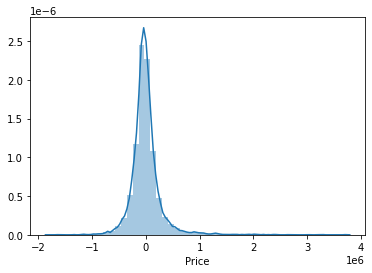

In [116]:
#Histogram o the distribution of residuals
sns.distplot(y_test-predictions)

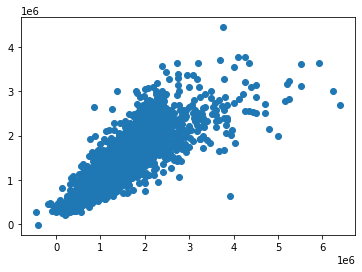

In [117]:
plt.scatter(y_test,predictions)

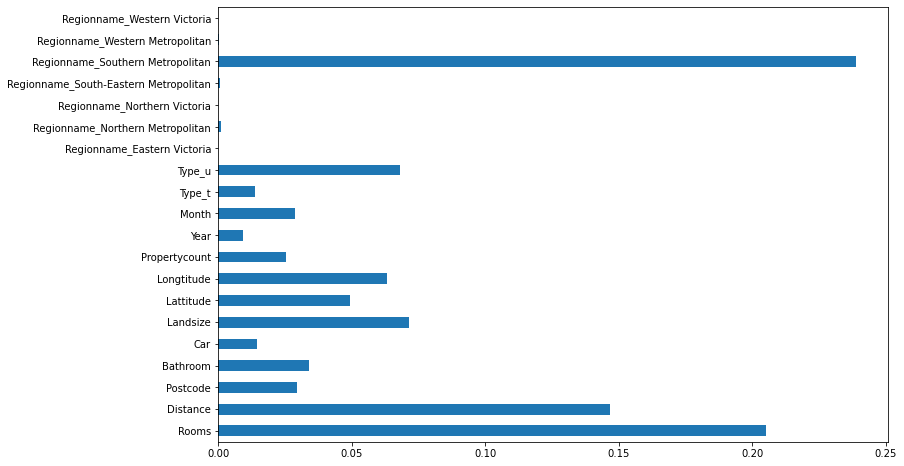

In [125]:
#let us find feature importance now i.e which feature is most important for this problem
importances=pd.Series(rf.feature_importances_,index=X.columns)
importances.plot(kind='barh',figsize=(12,8))
"""rf.fit(X_train,y_train)
features=X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')"""